# Evalution function

In [1]:
import math
def score(y_true, y_pred):
    s = 0
    for r_true, r_pred in zip(y_true, y_pred):
        d = r_pred - r_true
#         print(d)
        if d < 0 :
            s+=(math.exp(-d/13)-1)
        else:
            s+=(math.exp(d/10)-1)
    return s

# Load train data

In [2]:
import numpy as np
import pandas as pd
f = open('train_FD001.txt')
lines = f.readlines()
res = []
for i in lines:
    res.append(i.split(' ')[:-2])
res_array = np.array(res)
res_array.shape

(20631, 26)

In [3]:
columns_tmp = ['unit number','time','operational setting 1','operational setting 2','operational setting 3',\
               'sensor measurement  1','sensor measurement  2','sensor measurement  3','sensor measurement  4',\
               'sensor measurement  5','sensor measurement  6','sensor measurement  7','sensor measurement  8',\
               'sensor measurement  9','sensor measurement  10','sensor measurement  11','sensor measurement  12',\
               'sensor measurement  13','sensor measurement  14','sensor measurement  15','sensor measurement  16',\
               'sensor measurement  17','sensor measurement  18','sensor measurement  19','sensor measurement  20',\
               'sensor measurement  21']

In [4]:
df = pd.DataFrame(res_array,columns=columns_tmp)
df.head()

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.00,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.00,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.00,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.00,38.90,23.4044


In [5]:
df = df.astype('float')
df.head()

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1.0,1.0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190
1,1.0,2.0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236
2,1.0,3.0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442
3,1.0,4.0,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739
4,1.0,5.0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044


In [6]:
units = []
for i in range(1,101):
    test = df[df["unit number"]==i]
    test = test.reset_index()
    test = test.drop(columns = 'index')
#     test = test.ix[:, (test != test.ix[0]).any()]
#     test = test.set_index('time')
    units.append(test)

# load test data and label

In [7]:
f = open('test_FD001.txt')
lines = f.readlines()
res = []
for i in lines:
    res.append(i.split(' ')[:-2])
res_array = np.array(res)
res_array.shape
df = pd.DataFrame(res_array,columns=columns_tmp)
df.head()
df = df.astype('float')
df.head()
test_units = []
for i in range(1,101):
    test = df[df["unit number"]==i]
    test = test.reset_index()
    test = test.drop(columns = 'index')
#     test = test.ix[:, (test != test.ix[0]).any()]
#     test = test.set_index('time')
    test_units.append(test)

In [8]:
labels = []
f = open('RUL_FD001.txt')
lines = f.readlines()
for i in lines:
    labels.append(float(i))
# labels

# Model

In [9]:
from keras.layers import Dense, Activation, Dropout, LSTM, Input, GlobalMaxPooling1D
from keras.models import Sequential, load_model
from keras.models import Model
from keras import optimizers
import keras.backend as K
from keras.layers.core import Flatten
import keras
import tensorflow as tf
import h5py
import math
from keras.models import Model
from keras.layers import Activation, Concatenate, concatenate, Dense, Dropout, Embedding, Input, TimeDistributed,merge,Reshape
from keras.layers import GRU,LSTM, CuDNNLSTM, LeakyReLU, Masking, Lambda, Dot, BatchNormalization, Activation
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten
from keras.layers.wrappers import Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TerminateOnNaN, ModelCheckpoint
from keras_contrib.layers import CRF
from keras_contrib.utils import save_load_utils
from kutilities.layers import AttentionWithContext
from keras.optimizers import Adam, SGD
import keras.backend as K
from keras.layers import Dense, Activation, Multiply, Add, Lambda
import keras.initializers
from keras.regularizers import l1, l2
from keras.layers import Dense, Activation, Dropout, LSTM, Input
from keras.models import Sequential, load_model
from keras.models import Model

Using TensorFlow backend.


# data processing

In [10]:
from sklearn import preprocessing
scaler_minmax = preprocessing.MinMaxScaler()
data = units[1]
infer_seq_length = 9
y = data.time.values[infer_seq_length:]
y = max(y) - y
y = y/200
scale = max(data.time.values[infer_seq_length:])
new_data = scaler_minmax.fit_transform(data)
# new_data = data.values
# new_data = new_data.values
# new_data = scaler_minmax.fit_transform(data)

d = []
for i in range(new_data.shape[0]-infer_seq_length):
    d.append(new_data[i:i+infer_seq_length+1].tolist())
d = np.array(d)
# X = d[:,:,2:]
X = d[:,:,2:]
# y = d[:,infer_seq_length,1]
# y = max(y) - y
X.shape, y.shape

((278, 10, 24), (278,))

# model

In [11]:
# Model1 FC
inputs = Input(shape=(10,24))
x = Dense(64, kernel_initializer = keras.initializers.Orthogonal(gain=1.0, seed=None))(inputs)
x = Flatten()(x)
x = Activation('relu')(x)
x = Dense(50)(x)
x = Activation('relu')(x)
predictions = Dense(1, activation='linear')(x)
predictions = Activation('relu')(predictions) 
# predictions = GlobalMaxPooling1D()
simple_model = Model(inputs=inputs, outputs=predictions)
# sgd = optimizers.SGD(lr=0.01)
simple_model.compile(optimizer="adam",loss = 'mse')
simple_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 24)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 64)            1600      
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                32050     
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dens

# Train a model in one unit

In [12]:
simple_model.fit(X, y,epochs=500 ,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 222 samples, validate on 56 samples
Epoch 1/500
222/222 [==============================] - 0s 937us/step - loss: 0.2945 - val_loss: 0.4654
Epoch 2/500
222/222 [==============================] - 0s 55us/step - loss: 0.0658 - val_loss: 0.0062
Epoch 3/500
222/222 [==============================] - 0s 51us/step - loss: 0.0399 - val_loss: 0.0092
Epoch 4/500
222/222 [==============================] - 0s 62us/step - loss: 0.0194 - val_loss: 0.0199
Epoch 5/500
222/222 [==============================] - 0s 85us/step - loss: 0.0115 - val_loss: 0.0189
Epoch 6/500
222/222 [==============================] - 0s 68us/step - loss: 0.0112 - val_loss: 0.0217
Epoch 7/500
222/222 [==============================] - 0s 62us/step - loss: 0.0079 - val_loss: 0.0103
Epoch 8/500
222/222 [==============================] - 0s 81us/step - loss: 0.0069 - val_loss: 0.0025
Epoch 9/500
222/222 [==============================] - 0s 53us/step - loss: 0.0062 - val_l

222/222 [==============================] - 0s 67us/step - loss: 3.5503e-04 - val_loss: 0.0044
Epoch 77/500
222/222 [==============================] - 0s 64us/step - loss: 3.0361e-04 - val_loss: 0.0044
Epoch 78/500
222/222 [==============================] - 0s 58us/step - loss: 2.9436e-04 - val_loss: 0.0049
Epoch 79/500
222/222 [==============================] - 0s 69us/step - loss: 2.5242e-04 - val_loss: 0.0049
Epoch 80/500
222/222 [==============================] - 0s 64us/step - loss: 2.7001e-04 - val_loss: 0.0043
Epoch 81/500
222/222 [==============================] - 0s 54us/step - loss: 2.9259e-04 - val_loss: 0.0053
Epoch 82/500
222/222 [==============================] - 0s 55us/step - loss: 2.4272e-04 - val_loss: 0.0042
Epoch 83/500
222/222 [==============================] - 0s 50us/step - loss: 2.8430e-04 - val_loss: 0.0043
Epoch 84/500
222/222 [==============================] - 0s 53us/step - loss: 3.1961e-04 - val_loss: 0.0040
Epoch 85/500
222/222 [============================

222/222 [==============================] - 0s 54us/step - loss: 3.3160e-05 - val_loss: 0.0082
Epoch 153/500
222/222 [==============================] - 0s 56us/step - loss: 2.5731e-05 - val_loss: 0.0086
Epoch 154/500
222/222 [==============================] - 0s 56us/step - loss: 3.3449e-05 - val_loss: 0.0080
Epoch 155/500
222/222 [==============================] - 0s 79us/step - loss: 5.8493e-05 - val_loss: 0.0082
Epoch 156/500
222/222 [==============================] - 0s 61us/step - loss: 6.4083e-05 - val_loss: 0.0077
Epoch 157/500
222/222 [==============================] - 0s 54us/step - loss: 8.1573e-05 - val_loss: 0.0080
Epoch 158/500
222/222 [==============================] - 0s 62us/step - loss: 5.5482e-05 - val_loss: 0.0084
Epoch 159/500
222/222 [==============================] - 0s 58us/step - loss: 2.5681e-05 - val_loss: 0.0081
Epoch 160/500
222/222 [==============================] - 0s 58us/step - loss: 1.9594e-05 - val_loss: 0.0079
Epoch 161/500
222/222 [===================

Epoch 228/500
222/222 [==============================] - 0s 63us/step - loss: 2.0405e-06 - val_loss: 0.0094
Epoch 229/500
222/222 [==============================] - 0s 57us/step - loss: 3.6375e-06 - val_loss: 0.0094
Epoch 230/500
222/222 [==============================] - 0s 61us/step - loss: 2.4438e-06 - val_loss: 0.0098
Epoch 231/500
222/222 [==============================] - 0s 59us/step - loss: 3.4074e-06 - val_loss: 0.0096
Epoch 232/500
222/222 [==============================] - 0s 51us/step - loss: 2.6778e-06 - val_loss: 0.0096
Epoch 233/500
222/222 [==============================] - 0s 56us/step - loss: 3.1091e-06 - val_loss: 0.0098
Epoch 234/500
222/222 [==============================] - 0s 58us/step - loss: 4.2222e-06 - val_loss: 0.0096
Epoch 235/500
222/222 [==============================] - 0s 49us/step - loss: 2.1743e-06 - val_loss: 0.0099
Epoch 236/500
222/222 [==============================] - 0s 61us/step - loss: 1.1630e-06 - val_loss: 0.0100
Epoch 237/500
222/222 [=====

Epoch 304/500
222/222 [==============================] - 0s 59us/step - loss: 1.0205e-06 - val_loss: 0.0105
Epoch 305/500
222/222 [==============================] - 0s 53us/step - loss: 5.8804e-07 - val_loss: 0.0103
Epoch 306/500
222/222 [==============================] - 0s 52us/step - loss: 8.5287e-07 - val_loss: 0.0104
Epoch 307/500
222/222 [==============================] - 0s 56us/step - loss: 1.4895e-06 - val_loss: 0.0101
Epoch 308/500
222/222 [==============================] - 0s 57us/step - loss: 4.9197e-07 - val_loss: 0.0103
Epoch 309/500
222/222 [==============================] - 0s 65us/step - loss: 1.0200e-06 - val_loss: 0.0101
Epoch 310/500
222/222 [==============================] - 0s 51us/step - loss: 7.2043e-07 - val_loss: 0.0102
Epoch 311/500
222/222 [==============================] - 0s 47us/step - loss: 2.4023e-07 - val_loss: 0.0101
Epoch 312/500
222/222 [==============================] - 0s 44us/step - loss: 2.0968e-07 - val_loss: 0.0102
Epoch 313/500
222/222 [=====

Epoch 380/500
222/222 [==============================] - 0s 63us/step - loss: 6.1701e-06 - val_loss: 0.0105
Epoch 381/500
222/222 [==============================] - 0s 62us/step - loss: 5.4552e-06 - val_loss: 0.0107
Epoch 382/500
222/222 [==============================] - 0s 61us/step - loss: 5.1794e-06 - val_loss: 0.0107
Epoch 383/500
222/222 [==============================] - 0s 58us/step - loss: 2.9531e-06 - val_loss: 0.0107
Epoch 384/500
222/222 [==============================] - 0s 50us/step - loss: 2.2998e-06 - val_loss: 0.0107
Epoch 385/500
222/222 [==============================] - 0s 50us/step - loss: 4.3075e-06 - val_loss: 0.0110
Epoch 386/500
222/222 [==============================] - 0s 59us/step - loss: 1.3882e-05 - val_loss: 0.0107
Epoch 387/500
222/222 [==============================] - 0s 52us/step - loss: 1.9410e-05 - val_loss: 0.0106
Epoch 388/500
222/222 [==============================] - 0s 65us/step - loss: 6.0200e-06 - val_loss: 0.0103
Epoch 389/500
222/222 [=====

Epoch 456/500
222/222 [==============================] - 0s 56us/step - loss: 8.6094e-06 - val_loss: 0.0108
Epoch 457/500
222/222 [==============================] - 0s 56us/step - loss: 4.7115e-06 - val_loss: 0.0101
Epoch 458/500
222/222 [==============================] - 0s 56us/step - loss: 3.1653e-06 - val_loss: 0.0101
Epoch 459/500
222/222 [==============================] - 0s 50us/step - loss: 1.8290e-06 - val_loss: 0.0104
Epoch 460/500
222/222 [==============================] - 0s 53us/step - loss: 4.8036e-06 - val_loss: 0.0108
Epoch 461/500
222/222 [==============================] - 0s 57us/step - loss: 1.1814e-05 - val_loss: 0.0106
Epoch 462/500
222/222 [==============================] - 0s 60us/step - loss: 3.6074e-05 - val_loss: 0.0105
Epoch 463/500
222/222 [==============================] - 0s 55us/step - loss: 6.0141e-06 - val_loss: 0.0105
Epoch 464/500
222/222 [==============================] - 0s 53us/step - loss: 1.0480e-05 - val_loss: 0.0099
Epoch 465/500
222/222 [=====

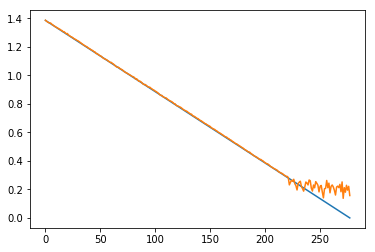

In [14]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(simple_model.predict(X))

In [15]:
y_pred = simple_model.predict(X) * 200
y = y * 200
score(y_pred, y)

310.7197816857492

# test model in the other unit

In [16]:
data = units[10]
infer_seq_length = 9
y_test = data.time.values[infer_seq_length:]
y_test = max(y_test) - y_test
scale = max(data.time.values[infer_seq_length:])
new_data = scaler_minmax.fit_transform(data)
# new_data = new_data.values
# new_data = scaler_minmax.fit_transform(data)

d = []
for i in range(new_data.shape[0]-infer_seq_length):
    d.append(new_data[i:i+infer_seq_length+1].tolist())
d = np.array(d)
X_test = d[:,:,2:]
# y_test = d[:,infer_seq_length,1]
# y_test = max(y_test) - y_test

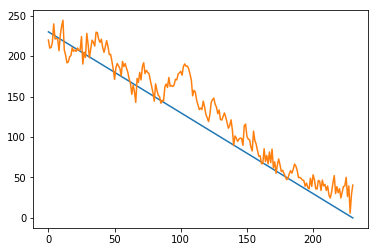

In [17]:
plt.plot(y_test)
plt.plot(simple_model.predict(X_test)*200)

In [18]:
y_pred = simple_model.predict(X_test) * 200
y_test = y_test 
score(y_pred, y_test)

1762.7260657221884

# Test model in test_set

In [31]:
preds = []
for i in range(100):
    data = test_units[i]
    infer_seq_length = 9
    new_data = scaler_minmax.fit_transform(data)
    d = []
    for i in range(new_data.shape[0]-infer_seq_length):
        d.append(new_data[i:i+infer_seq_length+1].tolist())
    d = np.array(d)
    # X = d[:,:,2:]
    X_test = d[:,:,2:]
    preds.append((simple_model.predict(X_test)*200)[-1])
score(labels, preds)

30430.20342261348

In [28]:
baseline1 = [50] * 100
score(labels, baseline)

123472.17637864401